# 0. Importing Libraries & titanic_data_clean

In [1]:
# titanic_data_clean Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Misc
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'matplotlib'

This titanic_titanic_titanic_data_clean_clean_cleanset can be found at https://www.kaggle.com/competitions/spaceship-titanic 
***
#### titanic_data_clean Fields:
__PassengerId__ <br>
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
__HomePlanet__ <br>
The planet the passenger departed from, typically their planet of permanent residence.<br>
__CryoSleep__ <br>
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
__Cabin__ <br>
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
__Destination__ <br>
The planet the passenger will be debarking to.<br>
__Age__ <br>
The age of the passenger.<br>
__VIP__ <br>
Whether the passenger has paid for special VIP service during the voyage.<br>
__RoomService, FoodCourt, ShoppingMall, Spa, VRDeck__ <br>
Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
__Name__ <br>
The first and last names of the passenger.<br>
__Transported__ <br>
Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

In [ ]:
# titanic_data = pd.read_csv("/home/mmmarinov/ProjectPortfolio/1. Titanic_SpaceShip - Binary Classification/Titanic_SpaceShip_Train_Data.csv")

#titanic_data = pd.read_csv(r"C:\Users\N179960\OneDrive - Munich Re\Martin Stuff\Personal\ProjectPortfolio\1. Data Science\1. Titanic_SpaceShip - Binary Classification\Titanic_SpaceShip_Train_Data.csv")

#titanic_data = pd.read_csv(r"\\192.168.68.200\ProjectPortfolio\1. Data Science\1. Titanic_SpaceShip - Binary Classification\Titanic_SpaceShip_Train_Data.csv")

titanic_data = pd.read_csv("/Users/martinmarinov/ProjectPortfolio/ProjectPortfolio/1. Data Science/1. Titanic_SpaceShip - Binary Classification/Titanic_SpaceShip_Train_Data.csv")


# 1. Investigate the titanic_data_clean

## 1.1 High-level understanding
This segment is to get a general sense of what kind of information is held

In [ ]:
titanic_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
titanic_data.info()

# Looking at what data types the dataset hold. Which needs to be changeed to float, and which whill need to be One-Hot Encoded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
titanic_data.describe(include='all')

# Viewing the mean, std, min, max for numerical values and unique for catagorical values
# Looking for an initial understanding of the spread and common values found in the dataset


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


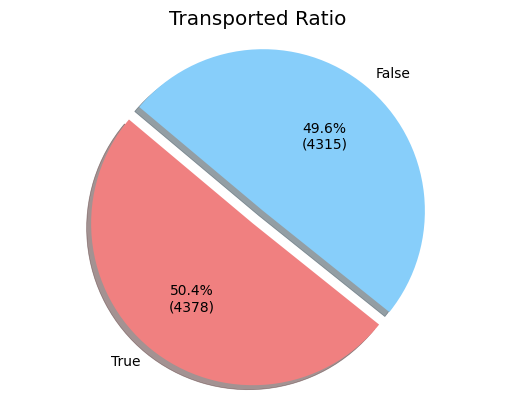

In [ ]:
# Sum treats the True as 1 and False as 0, Count will add everything regardless of T/F
true_count = titanic_data["Transported"].sum()
false_count = titanic_data["Transported"].count() - true_count

# Data to plot
labels = 'True', 'False'
sizes = [true_count, false_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (True) for emphasis

# {:1f}% will return a percentage with 1 decimal point. {:d} returns the full number.
def autopct_format(pct):
    return "{:.1f}%\n({:d})".format(pct, int(round(pct * sum(sizes) / 100)))

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format, shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Give a title to the chart
plt.title("Transported Ratio")

# Display the chart
plt.show()

# This data tells me that there isn't a class imbalance 
# and therefore we do not need to worry about undersampling, SMOTE, or class weight approaches

In [ ]:
titanic_data.isna().sum()

# Each column has missing information. Since it's numerical and catagorical, likely I'll need to use a mix of techniques to populate the values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Numerical: <br>
- Passenger_Id (If seperated) 
- Age (#)
- RoomService ($)
- FoodCourt ($)
- ShoppingMall ($)
- Spa ($)
- VRDeck ($)

Catagorical: <br>
- HomePlant (Unique: 3)
- Cryosleep (T/F)
- Cabin (Deck and Side)
- Destination (Unique: 3)
- VIP (T/F)
- Name (Mostly Unique)

Target Variable: <br>
- Transported (T/F)

## 1.2 Explore the titanic_data_clean

In [ ]:
# Make a copy so that the original remains untouched
titanic_data_eda = titanic_data.copy()


In [ ]:
# Breaking up Cabin to understand if there are trends with deck level or side of ship
titanic_data_eda[['Deck', 'Cabin_num', 'Side']
                 ] = titanic_data_eda['Cabin'].str.split('/', expand=True)

# Breaking up Passenger to view grouping
titanic_data_eda[['Pass_group', 'Pass_id']
                 ] = titanic_data_eda['PassengerId'].str.split('_', expand=True)


In [ ]:
# One Hot Encoding to view correlation, it can be interesting to see if these columns have strong relation to the target variable (Transported)
titanic_data_eda_dummies = pd.get_dummies(
    titanic_data_eda, columns=['Deck', 'Side'])

# Since these planets and destinations are closer/farther from one another with distance, it would be best to encode them as ordinal data rather than nominal
# The same logic can be applied to the Deck, but since we do not not for sure which is closer or farther, then we can not assign them just on alaphabetically order alone
titanic_data_eda_dummies['HomePlanet'] = titanic_data_eda_dummies['HomePlanet'].astype(
    'category').cat.codes
titanic_data_eda_dummies['Destination'] = titanic_data_eda_dummies['Destination'].astype(
    'category').cat.codes


In [ ]:
titanic_data_eda_dummies


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_num,Pass_group,Pass_id,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0001,01,False,True,False,False,False,False,False,False,True,False
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0002,01,False,False,False,False,False,True,False,False,False,True
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0003,01,True,False,False,False,False,False,False,False,False,True
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0003,02,True,False,False,False,False,False,False,False,False,True
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0004,01,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,A/98/P,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,98,9276,01,True,False,False,False,False,False,False,False,True,False
8689,9278_01,0,True,G/1499/S,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1499,9278,01,False,False,False,False,False,False,True,False,False,True
8690,9279_01,0,False,G/1500/S,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1500,9279,01,False,False,False,False,False,False,True,False,False,True
8691,9280_01,1,False,E/608/S,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,608,9280,01,False,False,False,False,True,False,False,False,False,True


In [ ]:
# Removing unneeded columns. This is due to the unlikelyhood of them being valuable predictors.
titanic_data_eda_dropped = titanic_data_eda_dummies.drop(
    ['PassengerId', 'Cabin', 'Name', 'Cabin_num', 'Pass_id'], axis=1)
titanic_data_eda_dropped


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pass_group,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,False,True,False,False,False,False,False,False,True,False
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,False,False,False,False,False,True,False,False,False,True
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,True,False,False,False,False,False,False,False,False,True
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,True,False,False,False,False,False,False,False,False,True
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,True,False,False,False,False,False,False,False,True,False
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,False,False,False,False,False,False,True,False,False,True
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,False,False,False,False,False,False,True,False,False,True
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,False,False,False,False,True,False,False,False,False,True


In [ ]:
# Changing the catagorical fields into numerical so that it can all be analyzed
titanic_data_eda_dropped[['CryoSleep', 'VIP', 'Transported', 'Pass_group']] = titanic_data_eda_dropped[[
    'CryoSleep', 'VIP', 'Transported', 'Pass_group']].astype('float64')


In [ ]:
titanic_data_eda_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int8   
 1   CryoSleep     8476 non-null   float64
 2   Destination   8693 non-null   int8   
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   float64
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   float64
 11  Pass_group    8693 non-null   float64
 12  Deck_A        8693 non-null   bool   
 13  Deck_B        8693 non-null   bool   
 14  Deck_C        8693 non-null   bool   
 15  Deck_D        8693 non-null   bool   
 16  Deck_E        8693 non-null   bool   
 17  Deck_F        8693 non-null   bool   
 18  Deck_G        8693 non-null 

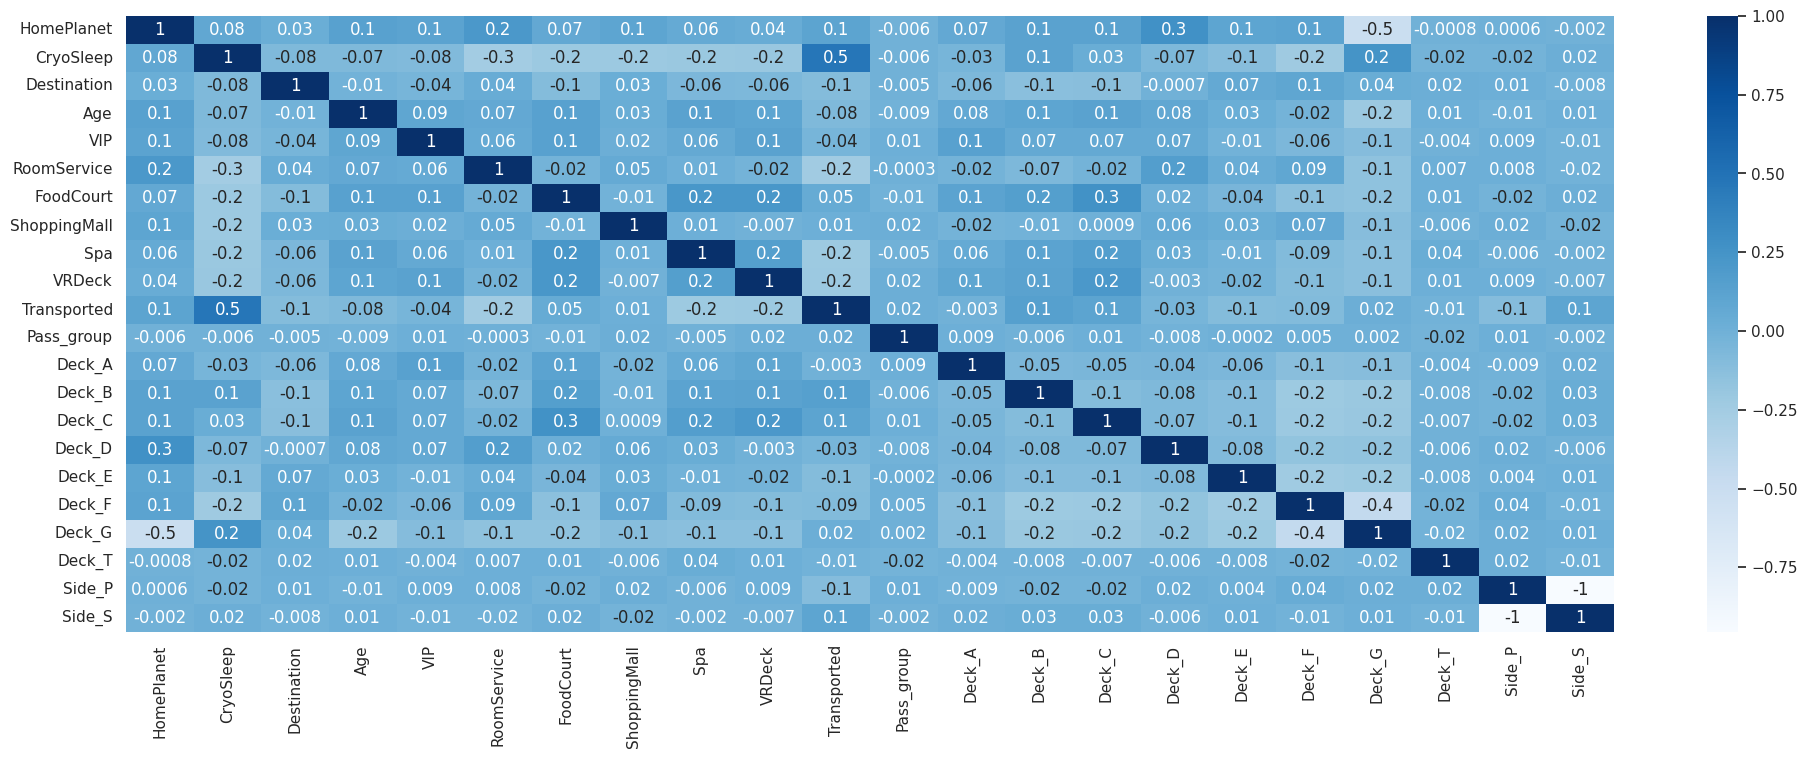

In [ ]:
plt.figure(figsize=(24, 8))
sns.set_theme(style="white")
corr = titanic_data_eda_dropped.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

# The interesting relation to note is Cryosleep. Which looks to be at 0.5 in relation with Transported without any data cleaning.
# This looks like it is going to be a strong predictor and will need special attention when populating nulls.
# The next highest/lowest is +-0.2 which mainly comes from the different spend categories like RoomService or Spa/VRDeck.
# Since their relation is negative I should see that spending more decreased the chance of being transported


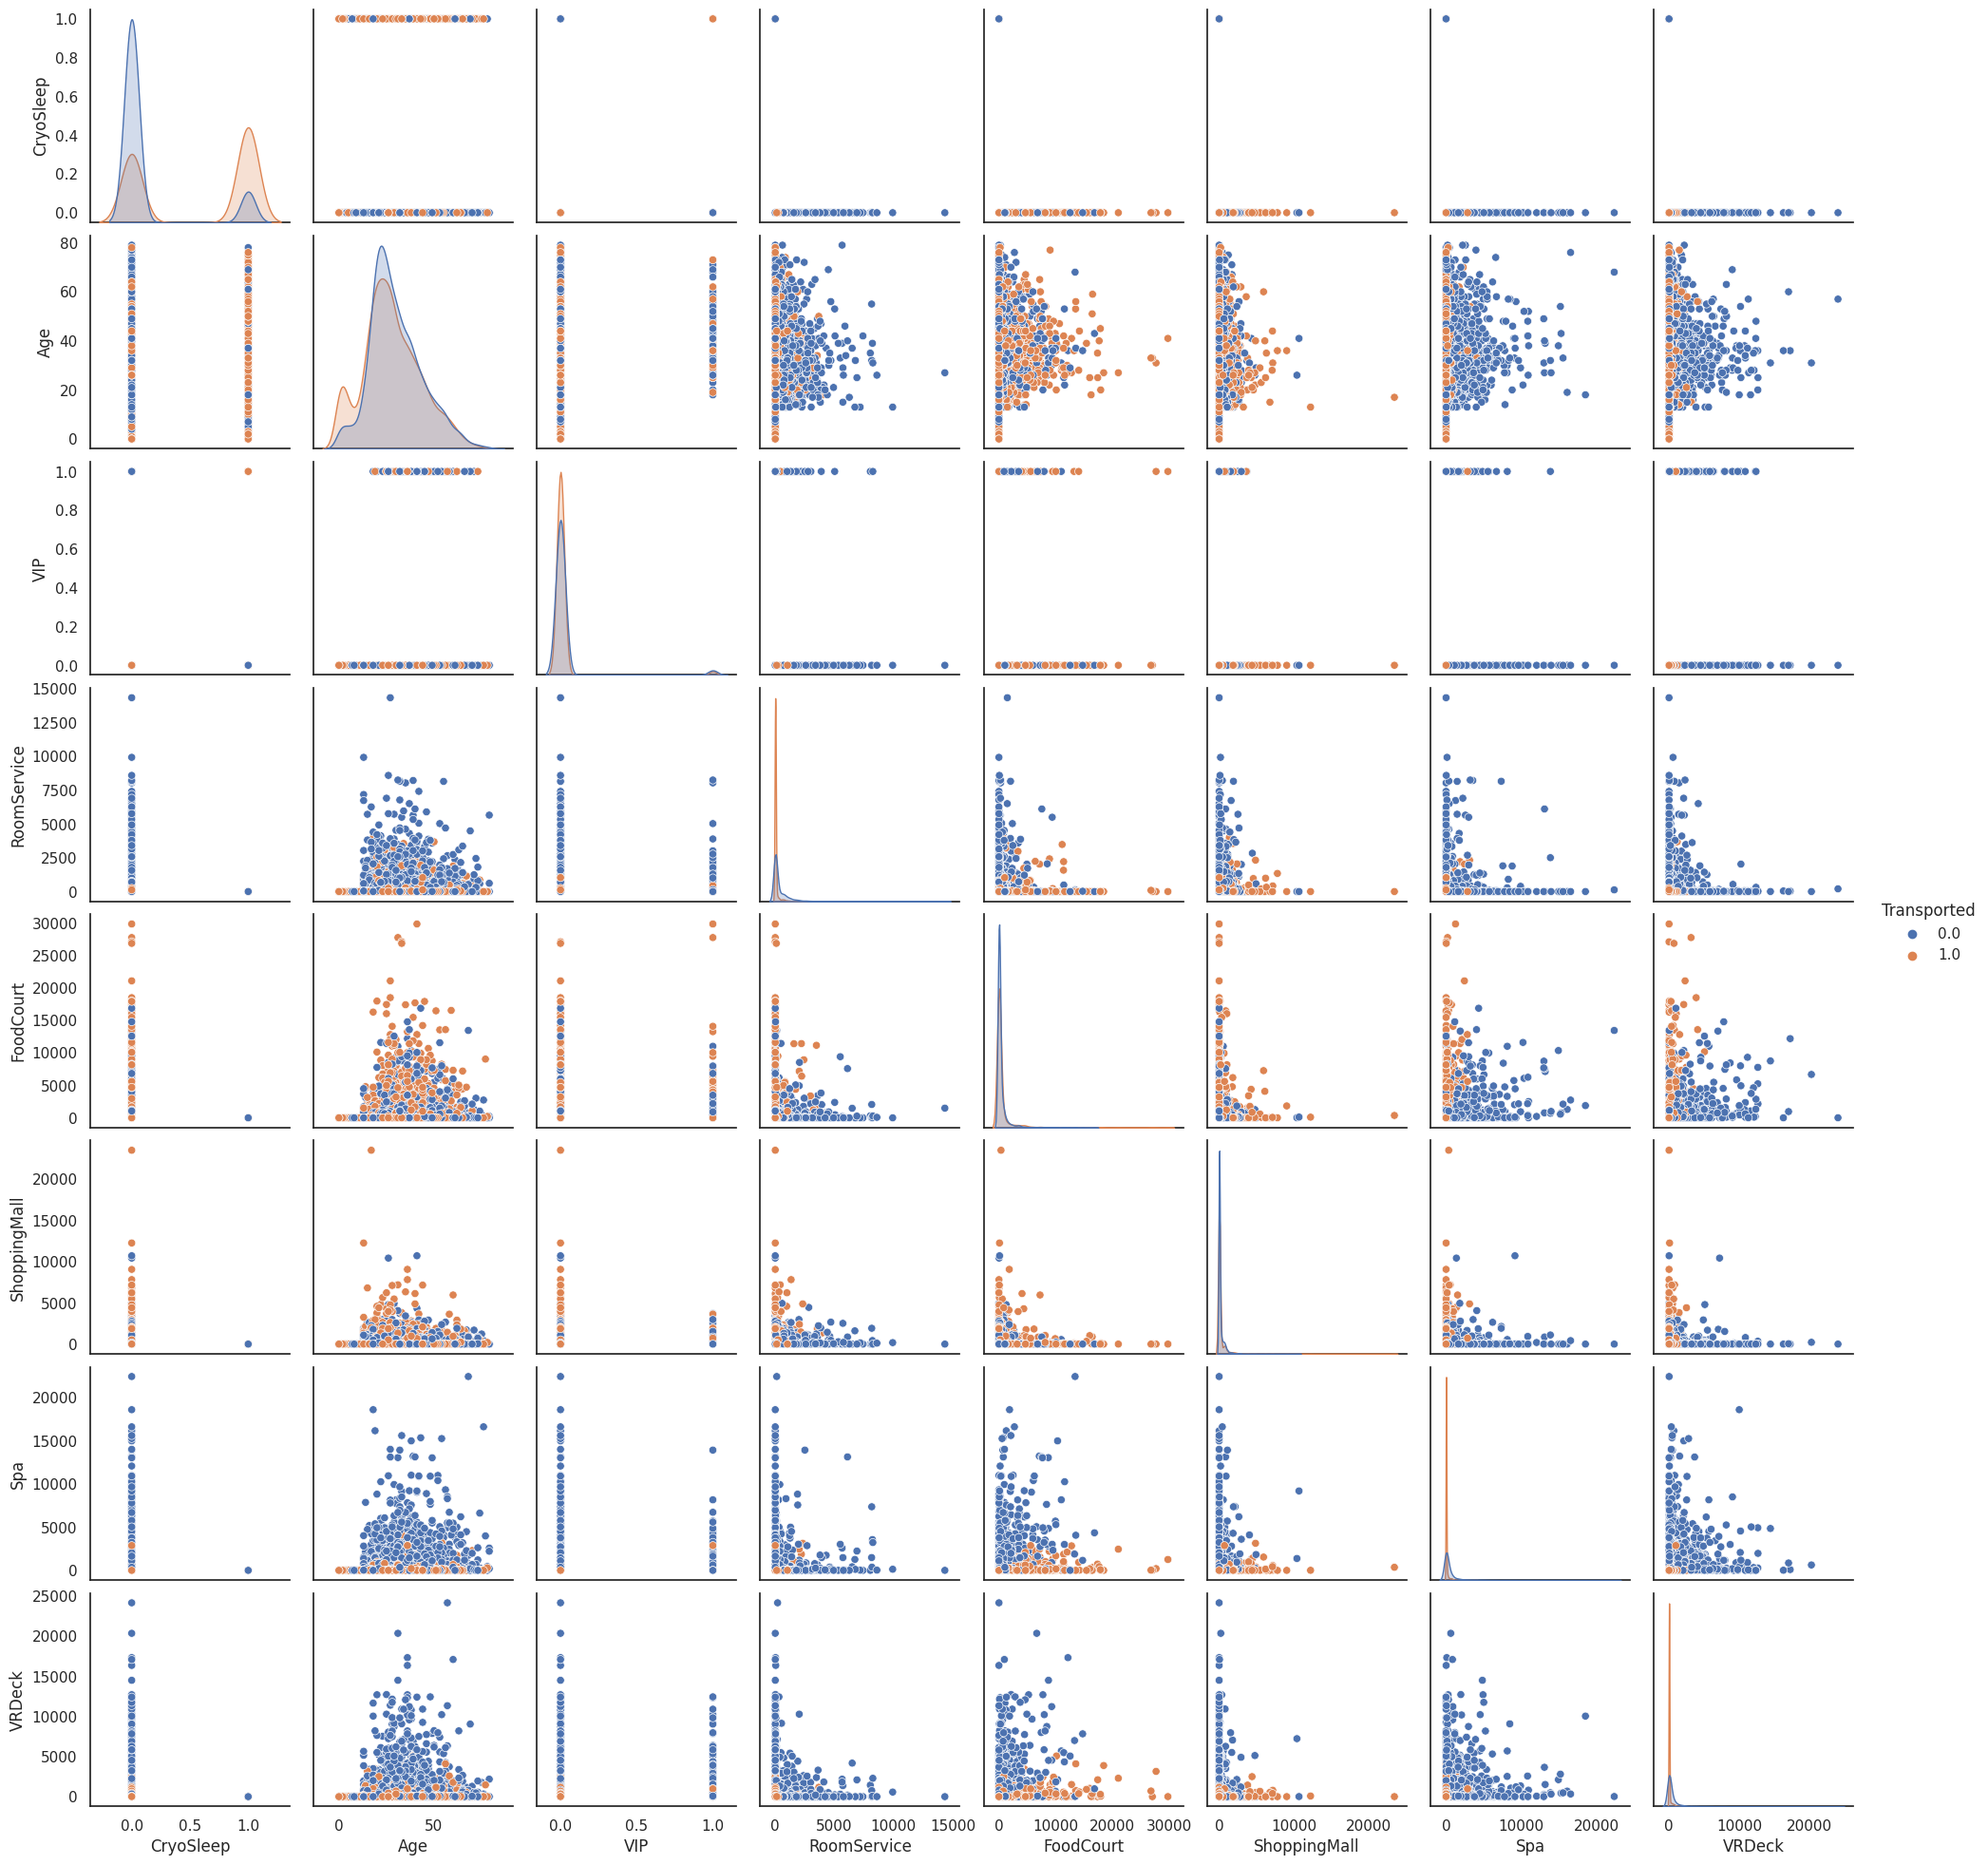

'\nBlue = Transported\n\nThings to note:\n- Someone in CryoSleep does not spend any money. I can use this to populate missing CryoSleep and the Expense columns\n- The ratio of those who were transported vs not is apparent for CryoSleep and Age. Showing that these can be valuable features for prediction\n- Looking at the spending, people who spent more money at the Spa/VRdeck/RoomService were less likely to be transported. While the opposite is true for Foodcourt and Shopping Mall\n    - This ties back to the heatmap and provides a better look into the spread of the data points\n- There is an age minmium to be a VIP. This can be used to fill in null values for Age or vise versa. We know that a 5 year old can not be a VIP\n- There is an Age minimum to spending money as well. If VIP is null or False, then we can use moeny spent as a group to identify the mean value to fill in.\n'

In [ ]:
columns = ['CryoSleep', 'Age', 'VIP', 'RoomService',
           'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.pairplot(titanic_data_eda_dropped, vars=columns, hue='Transported')
plt.show()


"""
Blue = Transported

Things to note:
- Someone in CryoSleep does not spend any money. I can use this to populate missing CryoSleep and the Expense columns
- The ratio of those who were transported vs not is apparent for CryoSleep and Age. Showing that these can be valuable features for prediction
- Looking at the spending, people who spent more money at the Spa/VRdeck/RoomService were less likely to be transported. While the opposite is true for Foodcourt and Shopping Mall
    - This ties back to the heatmap and provides a better look into the spread of the data points
- There is an age minmium to be a VIP. This can be used to fill in null values for Age or vise versa. We know that a 5 year old can not be a VIP
- There is an Age minimum to spending money as well. If VIP is null or False, then we can use moeny spent as a group to identify the mean value to fill in.
"""


In [ ]:
# This proves my first obeservation with the relation to CryoSleep & Expenses
titanic_data_eda_dropped[['CryoSleep', 'RoomService', 'FoodCourt',
                          'Spa', 'ShoppingMall', 'VRDeck']].groupby('CryoSleep').sum()


,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
CryoSleep,,,,,
0.0,1865582.0,3799600.0,2588931.0,1443579.0,2530810.0
1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# The youngest VIP is 18 Year Old
titanic_data_eda_dropped[['VIP', 'Age']].groupby('VIP').min()


,Age
VIP,
0.0,0.0
1.0,18.0


In [ ]:
# The youngest to spend any money is 13 Years Old
titanic_data_eda_dropped[['RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck', 'Age']]\
    .groupby('Age')\
    .sum()\
    .head(20)


,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
titanic_data_eda_dropped.columns


Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Pass_group', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'],
      dtype='object')

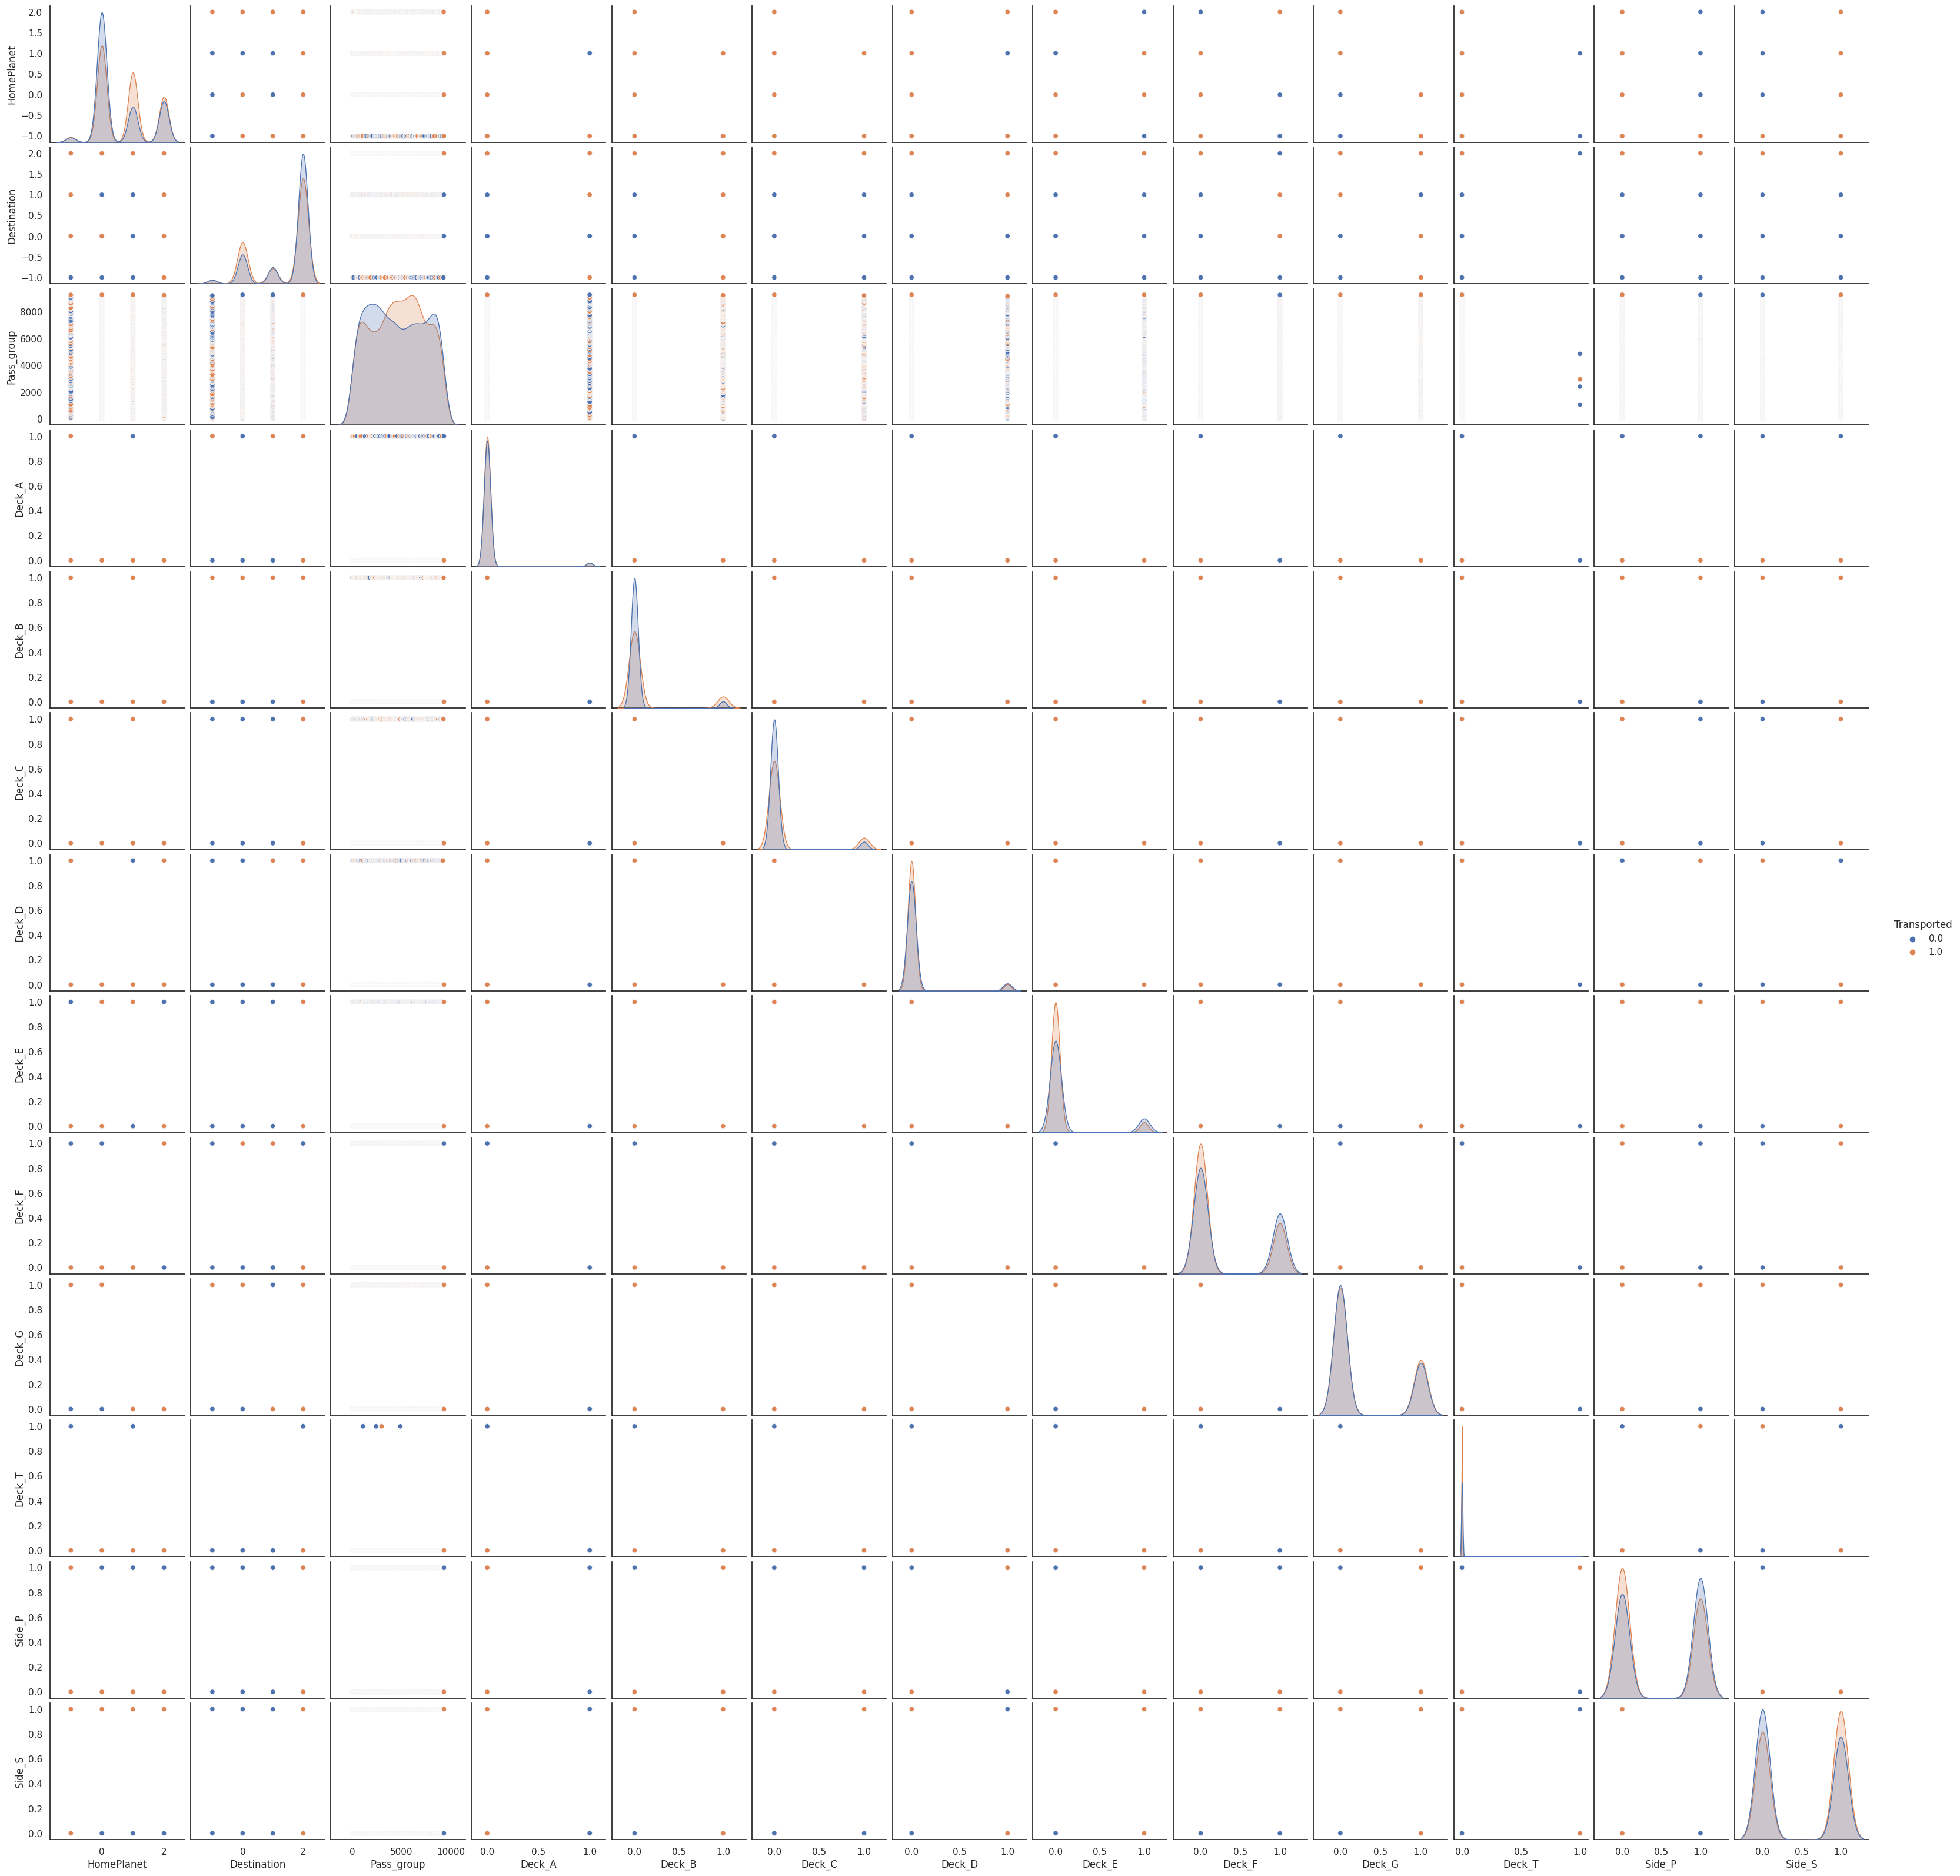

'\nBlue = Transported\n\nThings to note:\n- HomePlanet has some ability to predict the target variable. This ties back well to the heatmap. \n- Deck Side as expected is redudent. Keeping 1 would be fine. \n- Deck Level do not show much valuable information. It would be best to test whether the model fits better with or without this information.\n'

In [ ]:
columns = ['HomePlanet', 'Destination', 'Pass_group', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
           'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S']
sns.pairplot(titanic_data_eda_dropped, vars=columns, hue='Transported')
plt.show()

"""
Blue = Transported

Things to note:
- HomePlanet has some ability to predict the target variable. This ties back well to the heatmap. 
- Deck Side as expected is redudent. Keeping 1 would be fine. 
- Deck Level do not show much valuable information. It would be best to test whether the model fits better with or without this information.
"""


In [ ]:
pass_group_counts = titanic_data_eda_dropped['Pass_group'].value_counts()
pass_group_counts_greater_than_one = pass_group_counts[pass_group_counts > 1]
pass_group_counts_greater_than_one


Pass_group
4498.0    8
8168.0    8
8728.0    8
8796.0    8
8956.0    8
         ..
8115.0    2
8136.0    2
1503.0    2
1130.0    2
8398.0    2
Name: count, Length: 1412, dtype: int64

In [ ]:
# Check to see if I can use the passenger group to fill in null values
titanic_data_eda_dropped[titanic_data_eda_dropped['Pass_group'].isin(pass_group_counts_greater_than_one.index) &
                         (titanic_data_eda_dropped['VIP'].isna())]


# (titanic_data_eda_dropped['VIP'].isna())


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pass_group,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
102,0,0.0,2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,108.0,False,False,False,False,False,False,True,False,False,True
228,2,1.0,0,14.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,244.0,False,False,False,False,False,True,False,False,False,True
582,1,0.0,2,37.0,NaN,27.0,654.0,10.0,881.0,9568.0,0.0,607.0,False,False,True,False,False,False,False,False,True,False
596,1,1.0,2,39.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,619.0,False,False,True,False,False,False,False,False,False,True
649,0,1.0,2,5.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,680.0,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,1,0.0,2,21.0,NaN,3036.0,32.0,0.0,2.0,416.0,0.0,8945.0,False,False,False,True,False,False,False,False,False,True
8367,1,0.0,2,57.0,NaN,0.0,13.0,0.0,52.0,11325.0,0.0,8948.0,False,True,False,False,False,False,False,False,False,True
8494,0,1.0,2,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,9074.0,False,False,False,False,False,False,True,False,False,True
8512,0,0.0,1,16.0,NaN,0.0,0.0,761.0,0.0,0.0,0.0,9081.0,False,False,False,False,False,True,False,False,True,False


# 1.3 Clean the titanic_data_clean

In [ ]:
del titanic_data_clean
del titanic_data_clean_complete


In [ ]:
# Copying the titanic_data_clean once more to start fresh and seperate out the eda
titanic_data_clean = titanic_data.copy()


In [ ]:
titanic_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


What fields to use: <br>
>PassengerId  | Exclude  <br>
HomePlanet   | Include <br>
CryoSleep    | Include  <br>
Cabin        | T/E Deck, Keep 1 Side  <br> 
Destination  | Include  <br>
Age          | Include  <br>
VIP          | Include  <br>
RoomService  | Include  <br>
FoodCourt    | Include  <br>
ShoppingMall | Include  <br>
Spa          | Include  <br>
VRDeck       | Include  <br>
Name         | Exclude  <br>

What I know regarding populating missing values
- Those who are in CryoSleep could not have spent any money, therefore if CryoSleep = True then the null expenses values are 0
    - If Cryosleep is null, then sum the expenses and if it is 0 then set the value to True
    - If Cryosleep is True and an expense is null, then likely taking the mean of that column will be sufficent
- If Age is null, then I can use VIP and whether they spent money or not as a way to identify.
    - People under the age of 18 look like they can't be VIP based on the PairPlot. So if a null Age is VIP then we can use the mean of the VIP group to fill in the null value. 
    - Same goes for money spent. If there is any money spent, then we know they are at least 13 years or older meaning we can derive the mean age from that group. 
- I can use the passenger group to fill in missing home planet or Deck Side values, otherwise take the most frequent

In [ ]:
titanic_data_clean.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Populating NAN's using Domain Logic & Catagorical Imputer

In [ ]:
del df

In [ ]:
df = titanic_data.copy()

In [ ]:
# Cryosleep & Expenses
# sum all $ columns into one expense column
expense_columns = ['RoomService', 'FoodCourt',
                    'ShoppingMall', 'Spa', 'VRDeck']
# add this column to the dataframe
df['Expenses'] = df[expense_columns].sum(axis=1)
# run a script that populates null CryoSleep based on whether or not the expense column has $0 or not
df['CryoSleep'] = df.apply(lambda row: True if pd.isna(
    row['CryoSleep']) and row['Expenses'] == 0 else False, axis=1).astype('bool')

# Populates NaN Expenses based on whether the person is in CryoSleep or not. 
# True Cryosleep means they couldn't have spent money.
for column in expense_columns:
    df[column] = df.apply(lambda row: 0 if pd.isna(
        row[column]) and row['CryoSleep'] == True else row[column], axis=1).astype('float64')
    df[column] = df.apply(lambda row: df[column].mean() if pd.isna(
        row[column]) else row[column], axis=1).astype('float64')    

In [ ]:
df[df['CryoSleep']==True][expense_columns].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
# Age & VIP
df['VIP'] = df.apply(lambda row: False
                        if pd.isna(row['VIP']) and row['Age'] < 18
                        else row['VIP'], axis=1).astype('bool')

VIP_true = df[df['VIP'] == True].Age.mean()
VIP_false = df[df['VIP'] == False].Age.mean()

df['Age'] = df.apply(lambda row: VIP_true
                        if pd.isna(row['Age']) and row['VIP'] == True
                        else row['Age'], axis=1).astype('float64')
df['Age'] = df.apply(lambda row: VIP_false
                        if pd.isna(row['Age']) and row['VIP'] == False
                        else row['Age'], axis=1).astype('float64')

In [ ]:
df[['Age','VIP']].isna().sum()

Age    0
VIP    0
dtype: int64

In [ ]:
print(f"Mean Age for VIP's: {VIP_true:.1f} Yrs \nMean Age for Non-VIP's: {VIP_false:.1f} Yrs")


Mean Age for VIP's: 35.7 Yrs 
Mean Age for Non-VIP's: 28.5 Yrs


In [ ]:
# Catagorical Imputing

categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_columns = ['HomePlanet', 'Destination','Cabin','VIP']

# Impute missing values in the categorical columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


In [ ]:
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df[['Pass_group', 'Pass_id']] = df['PassengerId'].str.split('_', expand=True)

df['Pass_group'] = pd.to_numeric(df['Pass_group'])

df = pd.get_dummies(df, columns=['Deck', 'Side'])

df['HomePlanet'] = df['HomePlanet'].astype('category').cat.codes
df['Destination'] = df['Destination'].astype('category').cat.codes

df = df.drop(['PassengerId', 'Cabin', 'Name',
                'Cabin_num', 'Pass_id', 'Side_S'], axis=1)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses,Pass_group,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,False,True,False,False,False,False,False,False,True
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,2,False,False,False,False,False,True,False,False,False
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,3,True,False,False,False,False,False,False,False,False
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,3,True,False,False,False,False,False,False,False,False
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,4,False,False,False,False,False,True,False,False,False


In [ ]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Expenses        0
Pass_group      0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_P          0
dtype: int64

# 2. Data Pipeline & Modelling

## 2.1 Create Preprocessing Pipeline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv("/workspaces/ProjectPortfolio/1. Data Science/1. Titanic_SpaceShip - Binary Classification/Titanic_SpaceShip_Train_Data.csv")

def CryoExpenseImputer(df):
    expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['Expenses'] = df[expense_columns].sum(axis=1)
    df['CryoSleep'] = df.apply(lambda row: True if pd.isna(row['CryoSleep']) and row['Expenses'] == 0 else False, axis=1).astype('float64')
    for column in expense_columns:
        df[column] = df.apply(lambda row: 0 if pd.isna(row[column]) and row['CryoSleep'] == True else row[column], axis=1).astype('float64')
        df[column] = df.apply(lambda row: df[column].mean() if pd.isna(row[column]) else row[column], axis=1).astype('float64')
    return df

def VIPAgeImputer(df):
    from sklearn.impute import SimpleImputer
    si = SimpleImputer(strategy='most_frequent')
    df['VIP'] = df.apply(lambda row: False if pd.isna(row['VIP']) and row['Age'] < 18 else row['VIP'], axis=1).astype('float64')
    df['VIP'] = si.fit_transform(df['VIP'].array.reshape(-1,1))
    
    VIP_true = df[df['VIP'] == True].Age.mean()
    VIP_false = df[df['VIP'] == False].Age.mean()

    df['Age'] = df.apply(lambda row: VIP_true if pd.isna(row['Age']) and row['VIP'] == True else row['Age'], axis=1).astype('float64')
    df['Age'] = df.apply(lambda row: VIP_false if pd.isna(row['Age']) and row['VIP'] == False else row['Age'], axis=1).astype('float64')  
    return df

def HomeDestImputer(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OrdinalEncoder

    si = SimpleImputer(strategy='most_frequent')
    oe = OrdinalEncoder()

    home_dest_cols = ['HomePlanet', 'Destination']

    for column in home_dest_cols:
        imputed_data = si.fit_transform(df[column].array.reshape(-1, 1))
        df[column] = imputed_data.ravel()  
        df[column] = oe.fit_transform(df[column].array.reshape(-1, 1))

    return df  

def CatagoryTransform(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    si = SimpleImputer(strategy='most_frequent')
    ohe = OneHotEncoder(handle_unknown='ignore')

    imputed_data = si.fit_transform(df['Cabin'].array.reshape(-1, 1))
    df['Cabin'] = imputed_data.ravel() 
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

    ohe.fit(df[['Deck', 'Side']])
    df_ohe = ohe.transform(df[['Deck', 'Side']]).toarray()

    ohe_columns = ohe.get_feature_names_out(['Deck', 'Side'])
    df = pd.concat([df, pd.DataFrame(df_ohe, columns=ohe_columns)], axis=1)

    return df

def DropColumns(df):
    df = df.drop(['PassengerId','Deck','Side','Cabin','Name','Cabin_num','Side_S'], axis=1)
    return df

X = titanic_data.drop(['Transported'], axis=1)
y = titanic_data[['Transported']]

xgb_classifier = xgb.XGBClassifier()

cryo_expense_imputer = FunctionTransformer(CryoExpenseImputer, validate=False)
vip_age_imputer = FunctionTransformer(VIPAgeImputer, validate=False)
Home_Dest_Impute = FunctionTransformer(HomeDestImputer, validate=False)
catagory_transform = FunctionTransformer(CatagoryTransform, validate=False)
drop_columns = FunctionTransformer(DropColumns, validate=False)

cryo_expense_imputer_pipeline = make_pipeline(cryo_expense_imputer)
vip_age_imputer_pipeline = make_pipeline(vip_age_imputer)
Home_Dest_Impute_pipeline = make_pipeline(Home_Dest_Impute)
catagory_transform_pipeline = make_pipeline(catagory_transform)
drop_columns_pipeline = make_pipeline(drop_columns)

preprocessing_pipeline = Pipeline(steps=[
    ('cryo_expense_imputer', cryo_expense_imputer_pipeline),
    ('vip_age_imputer', vip_age_imputer_pipeline),
    ('home_dest_imputer', Home_Dest_Impute_pipeline),
    ('catagory_transform', catagory_transform_pipeline),
    ('drop_columns', drop_columns_pipeline)
])

In [ ]:
preprocessed_data = preprocessing_pipeline.fit_transform(X)

cv_scores = cross_val_score(xgb.XGBClassifier(), preprocessed_data, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.7786084  0.80046003 0.80621047 0.80955121 0.79228999]
Mean cross-validation accuracy: 0.7974240185390199


In [ ]:
preprocessed_data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Expenses        0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_P          0
dtype: int64

## 2.2 Identify Best Model

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Preprocessing Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

# Model Testing
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
titanic_data = pd.read_csv("/workspaces/ProjectPortfolio/1. Data Science/1. Titanic_SpaceShip - Binary Classification/Titanic_SpaceShip_Train_Data.csv")

In [56]:
def CryoExpenseImputer(df):
    expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['Expenses'] = df[expense_columns].sum(axis=1)
    df['CryoSleep'] = df.apply(lambda row: True if pd.isna(row['CryoSleep']) and row['Expenses'] == 0 else False, axis=1).astype('float64')
    for column in expense_columns:
        df[column] = df.apply(lambda row: 0 if pd.isna(row[column]) and row['CryoSleep'] == True else row[column], axis=1).astype('float64')
        df[column] = df.apply(lambda row: df[column].mean() if pd.isna(row[column]) else row[column], axis=1).astype('float64')
    return df

def VIPAgeImputer(df):
    from sklearn.impute import SimpleImputer
    si = SimpleImputer(strategy='most_frequent')
    df['VIP'] = df.apply(lambda row: False if pd.isna(row['VIP']) and row['Age'] < 18 else row['VIP'], axis=1).astype('float64')
    df['VIP'] = si.fit_transform(df['VIP'].array.reshape(-1,1))
    
    VIP_true = df[df['VIP'] == True].Age.mean()
    VIP_false = df[df['VIP'] == False].Age.mean()

    df['Age'] = df.apply(lambda row: VIP_true if pd.isna(row['Age']) and row['VIP'] == True else row['Age'], axis=1).astype('float64')
    df['Age'] = df.apply(lambda row: VIP_false if pd.isna(row['Age']) and row['VIP'] == False else row['Age'], axis=1).astype('float64')  
    return df

def HomeDestImputer(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OrdinalEncoder

    si = SimpleImputer(strategy='most_frequent')
    oe = OrdinalEncoder()

    home_dest_cols = ['HomePlanet', 'Destination']

    for column in home_dest_cols:
        imputed_data = si.fit_transform(df[column].array.reshape(-1, 1))
        df[column] = imputed_data.ravel()  
        df[column] = oe.fit_transform(df[column].array.reshape(-1, 1))

    return df  

def CatagoryTransform(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder

    si = SimpleImputer(strategy='most_frequent')

    imputed_data = si.fit_transform(df['Cabin'].array.reshape(-1, 1))
    df['Cabin'] = imputed_data.ravel() 
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

    categorical_columns = ['Deck', 'Side']

    encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
    encoder.fit(df[categorical_columns])

    df_encoded_columns = encoder.transform(df[categorical_columns])

    df_encoded = pd.DataFrame(df_encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

    df = pd.concat([df.drop(categorical_columns, axis=1).reset_index(drop=True), df_encoded], axis='columns')

    return df

def DropColumns(df):
    df = df.drop(['PassengerId','Cabin','Name','Cabin_num'], axis=1)
    return df

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

si = SimpleImputer(strategy='most_frequent')

imputed_data = si.fit_transform(X['Cabin'].array.reshape(-1, 1))
X['Cabin'] = imputed_data.ravel() 
X[['Deck', 'Cabin_num', 'Side']] = X['Cabin'].str.split('/', expand=True)

categorical_columns = ['Deck', 'Side']

encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
encoder.fit(X[categorical_columns])

df_encoded_columns = encoder.transform(X[categorical_columns])
df_encoded_columns

df_encoded = pd.DataFrame(df_encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([X.drop(categorical_columns, axis=1), df_encoded], axis=1)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_num,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,1499,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,1500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [57]:
cryo_expense_imputer = FunctionTransformer(CryoExpenseImputer)
vip_age_imputer = FunctionTransformer(VIPAgeImputer)
Home_Dest_Impute = FunctionTransformer(HomeDestImputer)
catagory_transform = FunctionTransformer(CatagoryTransform)
drop_columns = FunctionTransformer(DropColumns)

cryo_expense_imputer_pipeline = make_pipeline(cryo_expense_imputer)
vip_age_imputer_pipeline = make_pipeline(vip_age_imputer)
Home_Dest_Impute_pipeline = make_pipeline(Home_Dest_Impute)
catagory_transform_pipeline = make_pipeline(catagory_transform)
drop_columns_pipeline = make_pipeline(drop_columns)

In [58]:
preprocessing_pipeline = Pipeline(steps=[
    ('cryo_expense_imputer', cryo_expense_imputer_pipeline),
    ('vip_age_imputer', vip_age_imputer_pipeline),
    ('home_dest_imputer', Home_Dest_Impute_pipeline),
    ('catagory_transform', catagory_transform_pipeline),
    ('drop_columns', drop_columns_pipeline)
])

In [60]:
X = titanic_data.drop(['Transported'], axis=1)
y = titanic_data['Transported']

In [61]:
models = [
    ('XGBoost', xgb.XGBClassifier(), {
        'model__eta': [0.01, 0.1, 1],
        'model__max_depth': [3, 4, 5]
    }),
    ('Logistic Regression', LogisticRegression(), {
        'model__C': [0.01, 0.1, 1.0, 10.0]
    }),
    ('Random Forest', RandomForestClassifier(), {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    ('Support Vector Machine', SVC(), {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf']
    })
]

In [63]:
results = []

# Cycle through each model
for model_name, model, param_grid in models:
    # Combine preprocessing pipeline with the model
    full_pipeline = Pipeline([
    ('cryo_expense_imputer', cryo_expense_imputer_pipeline),
    ('vip_age_imputer', vip_age_imputer_pipeline),
    ('home_dest_imputer', Home_Dest_Impute_pipeline),
    ('catagory_transform', catagory_transform_pipeline),
    ('drop_columns', drop_columns_pipeline),
    ('model', model)
    ])   # Perform grid search with cross-validation

    grid_search = GridSearchCV(full_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    results.append((model_name, best_score, best_params))

# Print the results
for model_name, best_score, best_params in results:
    print(f'{model_name}: Best Score = {best_score:.4f}, Best Parameters = {best_params}')

/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [52]:
from sklearn.model_selection import train_test_split
xgb_classifier = xgb.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_linebyline = cryo_expense_imputer_pipeline.fit_transform(X_train)

X_linebyline = vip_age_imputer_pipeline.fit_transform(X_linebyline)

X_linebyline = Home_Dest_Impute_pipeline.fit_transform(X_linebyline)

X_linebyline = catagory_transform_pipeline.fit_transform(X_linebyline)
print("catagory_transform:", X_linebyline.info())
X_linebyline = drop_columns_pipeline.fit_transform(X_linebyline)
print("drop_columns:", X_linebyline.info())

xgb_classifier.fit(X_linebyline, y_train)

X_linebyline = cryo_expense_imputer_pipeline.fit_transform(X_test)

X_linebyline = vip_age_imputer_pipeline.fit_transform(X_linebyline)

X_linebyline = Home_Dest_Impute_pipeline.fit_transform(X_linebyline)

X_linebyline = catagory_transform_pipeline.fit_transform(X_linebyline)
print("catagory_transform:", X_linebyline.info())
X_linebyline_test = drop_columns_pipeline.fit_transform(X_linebyline)
print("drop_columns:", X_linebyline.info())

y_pred = xgb_classifier.predict(X_linebyline_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6954 non-null   float64
 2   CryoSleep     6954 non-null   float64
 3   Cabin         6954 non-null   object 
 4   Destination   6954 non-null   float64
 5   Age           6954 non-null   float64
 6   VIP           6954 non-null   float64
 7   RoomService   6954 non-null   float64
 8   FoodCourt     6954 non-null   float64
 9   ShoppingMall  6954 non-null   float64
 10  Spa           6954 non-null   float64
 11  VRDeck        6954 non-null   float64
 12  Name          6795 non-null   object 
 13  Expenses      6954 non-null   float64
 14  Cabin_num     6954 non-null   object 
 15  Deck_A        6954 non-null   float64
 16  Deck_B        6954 non-null   float64
 17  Deck_C        6954 non-null   float64
 18  Deck_D        6954 non-null 

/workspaces/ProjectPortfolio/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Feature shape mismatch, expected: 20, got 19